# Data Visualization Final Assignment Part 1

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import folium

**Import Data**

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(URL)

df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


In [3]:
df.columns

Index(['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence',
       'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition',
       'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales',
       'Vehicle_Type', 'City'],
      dtype='object')

In [4]:
df.dtypes

Date                        object
Year                         int64
Month                       object
Recession                    int64
Consumer_Confidence        float64
Seasonality_Weight         float64
Price                      float64
Advertising_Expenditure      int64
Competition                  int64
GDP                        float64
Growth_Rate                float64
unemployment_rate          float64
Automobile_Sales           float64
Vehicle_Type                object
City                        object
dtype: object

# Creating Visualizations for Data Analysis

### TASK 1.1: Develop a *Line chart* using the functionality of pandas to show how automobile sales fluctuate from year to year


In [5]:
#create dataframe with variables of interest
df_yrsale = df.groupby(df['Year'])['Automobile_Sales'].mean()

df_yrsale.head()


Year
1980     678.950000
1981     633.408333
1982     631.150000
1983    2889.350000
1984    2972.250000
Name: Automobile_Sales, dtype: float64

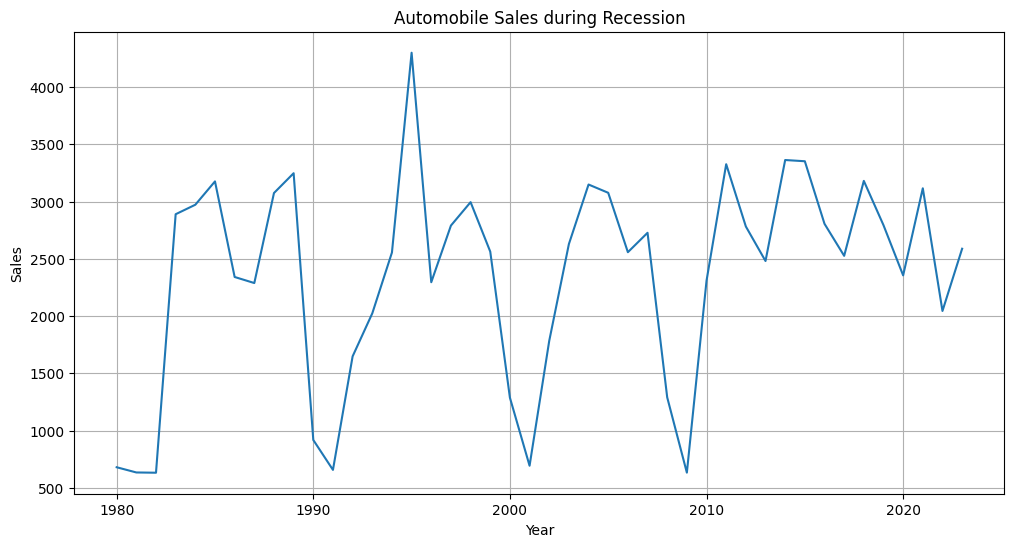

In [6]:
#plot
plt.figure(figsize=(12,6))
df_yrsale.plot(kind = 'line')
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.grid(True)
plt.show()


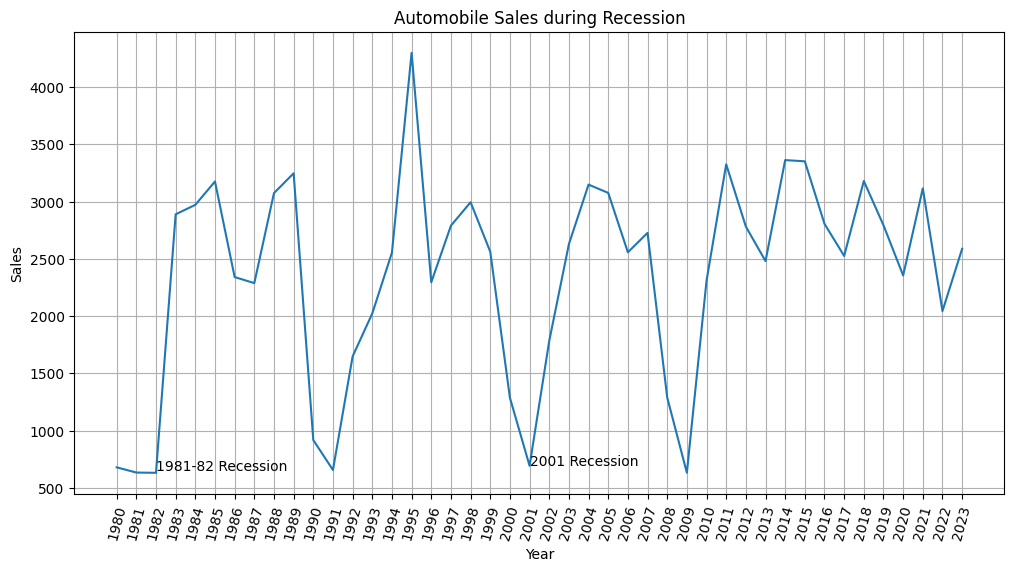

In [7]:
#plot
plt.figure(figsize=(12,6))
df_yrsale.plot(kind = 'line')
#add ticks for every year
plt.xticks(list(range(1980,2024)),rotation=75)
plt.title('Automobile Sales during Recession')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.text(1982, 650, '1981-82 Recession')
plt.text(2001, 693, '2001 Recession')
plt.grid(True)
plt.show()

####  TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?

In [8]:
# Grouping by Year and Vehicle_Type and summing the Automobile_Sales
df_typesale = df.groupby(['Year', 'Vehicle_Type'])['Automobile_Sales'].mean().unstack()

df_typesale.head()

Vehicle_Type,Executivecar,Mediumfamilycar,Smallfamiliycar,Sports,Supperminicar
Year,,,,,
1980,NaN,720.625000,695.233333,NaN,635.84
1981,NaN,628.400000,638.420000,NaN,630.90
1982,NaN,723.271429,602.225000,102.00,NaN
1983,4120.2,3211.400000,1676.866667,3999.35,2338.55
1984,3130.8,4099.900000,2058.600000,2514.00,2805.30


In [9]:
# replace NaN with zero
df_typesale.fillna(0, inplace=True)

In [10]:
#check the nas
df_typesale.head()

Vehicle_Type,Executivecar,Mediumfamilycar,Smallfamiliycar,Sports,Supperminicar
Year,,,,,
1980,0.0,720.625000,695.233333,0.00,635.84
1981,0.0,628.400000,638.420000,0.00,630.90
1982,0.0,723.271429,602.225000,102.00,0.00
1983,4120.2,3211.400000,1676.866667,3999.35,2338.55
1984,3130.8,4099.900000,2058.600000,2514.00,2805.30


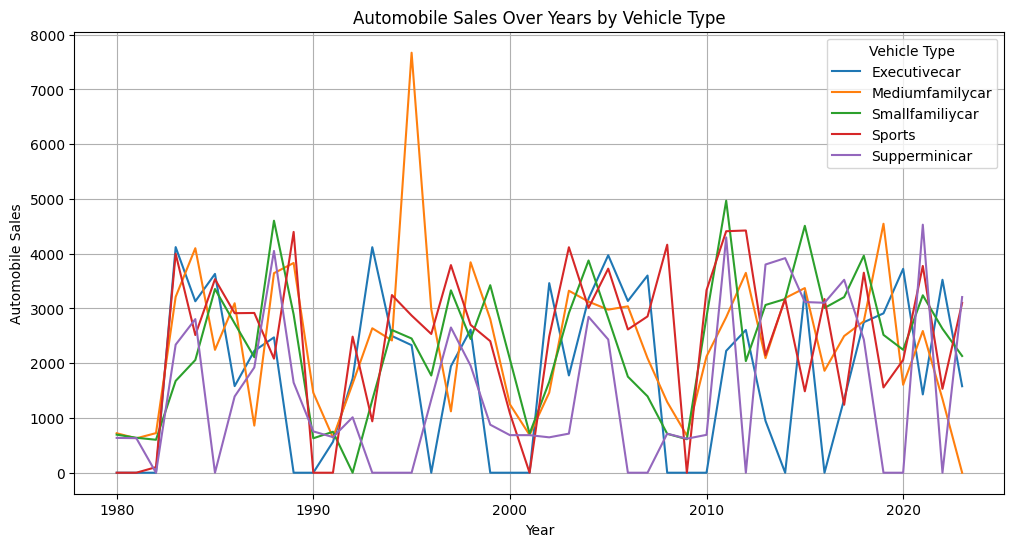

In [11]:
df_typesale.plot(kind='line', figsize=(12,6))
# Adding labels and title
plt.xlabel('Year')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales Over Years by Vehicle Type')
plt.legend(title='Vehicle Type')
plt.grid(True)
plt.show()

### TASK 1.3: Use the functionality of **Seaborn Library** to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.

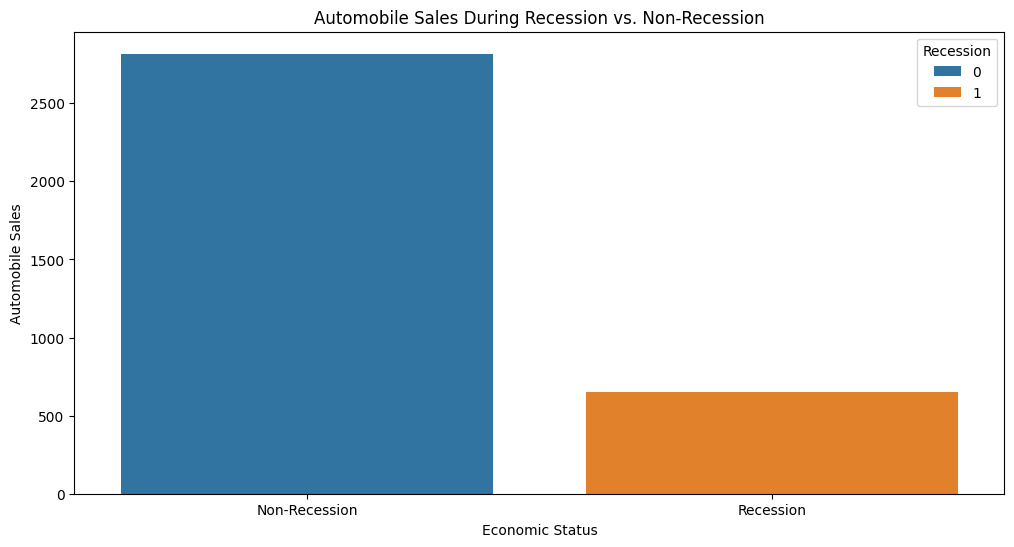

In [38]:
df_recsale = df.groupby('Recession')['Automobile_Sales'].mean().reset_index()

#plot
plt.figure(figsize=(12,6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Recession', data = df_recsale)

plt.xlabel('Economic Status')
plt.ylabel('Automobile Sales')
plt.title('Automobile Sales During Recession vs. Non-Recession')
plt.xticks(ticks=[0,1], labels=['Non-Recession', 'Recession'])
plt.show()

### Now you want to compare the sales of different vehicle types during a recession and a non-recession period

Use Seaborn

`recession_data` contains data only for recession periods.
`dd` provides the average automobile sales, grouped by whether it was a recession and by vehicle type.
`sales_by_vehicle_type` shows the total sales for each vehicle type during recession periods.

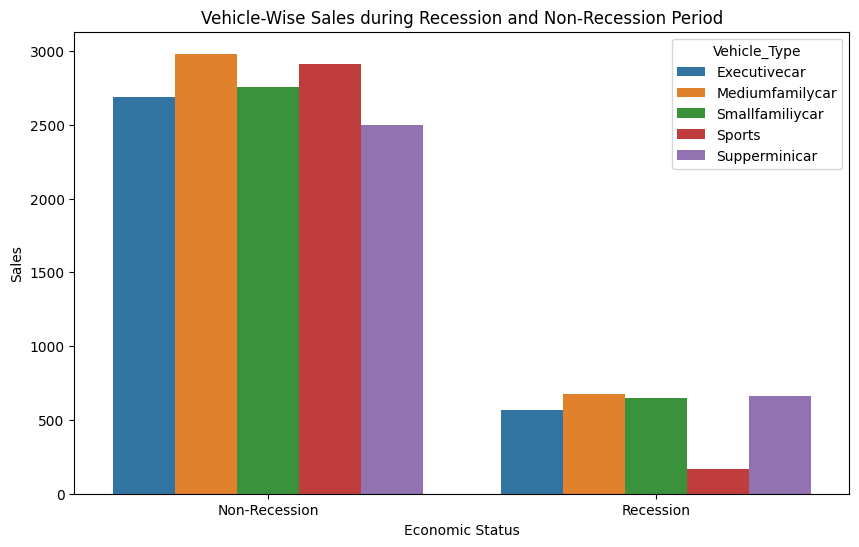

In [13]:
# Filter the data to include only rows where Recession = 1 (years/months when there was a recession)
recession_data = df[df['Recession'] == 1]

#group data by Recession and Vehicle Type then caclulate the mean of Automobile Sales for each group.
dd=df.groupby(['Recession','Vehicle_Type'])['Automobile_Sales'].mean().reset_index() #reset_index makes Recession and Vehicle_Type regular columns rather than the index

# Calculate the total sales volume by vehicle type during recessions
#group the filtered recession data by 'Vehicle_Type'
#sum sales for each vehicle type
sales_by_vehicle_type = recession_data.groupby('Vehicle_Type')['Automobile_Sales'].sum().reset_index()

# Create the grouped bar chart using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=dd)
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'])
plt.xlabel('Economic Status')
plt.ylabel('Sales')
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period')

plt.show()

### TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.
<br>Now, you want to find more insights from the data to understand the reason. <br>Plot a two line charts using subplotting to answer:-
#### How did the GDP vary over time during recession and non-recession periods? 
<br>Make use of <u>add_subplot()</u> from Matplotlib for this comparision.

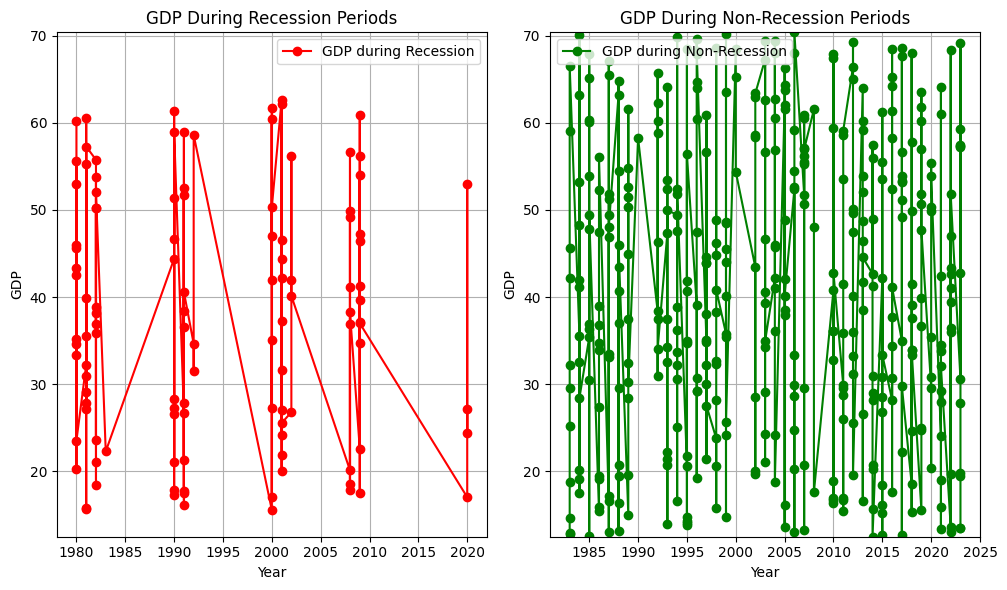

In [15]:
# Splitting the data into recession and non-recession periods
recession_data = df[df['Recession'] == 1]
non_recession_data = df[df['Recession'] == 0]

# Determine the common y-axis limits
y_min = min(df['GDP'])
y_max = max(df['GDP'])

# Creating the plot
fig = plt.figure(figsize=(10, 6))

# Subplot for recession periods
ax1 = fig.add_subplot(121)  # 1 row, 2 columns, subplot 1
ax1.plot(recession_data['Year'], recession_data['GDP'], label='GDP during Recession', color='red', marker='o')
ax1.set_title('GDP During Recession Periods')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP')
ax1.legend()
ax1.grid(True)
ax1.set_ylim(y_min, y_max)  # Set the y-axis range

# Subplot for non-recession periods
ax2 = fig.add_subplot(122)  # 1 row, 2 columns, subplot 2
ax2.plot(non_recession_data['Year'], non_recession_data['GDP'], label='GDP during Non-Recession', color='green', marker='o')
ax2.set_title('GDP During Non-Recession Periods')
ax2.set_xlabel('Year')
ax2.set_ylabel('GDP')
ax2.legend()
ax2.grid(True)
ax2.set_ylim(y_min, y_max)  # Set the y-axis range

plt.tight_layout()
plt.show()

### TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales.
<br>How has seasonality impacted the sales, in which months the sales were high or low? Check it for non-recession years to understand the trend

##### Develop a Bubble plot for displaying Automobile Sales for every month and use Seasonality Weight for representing the size of each bubble<br>
Title this plot as 'Seasonality impact on Automobile Sales'

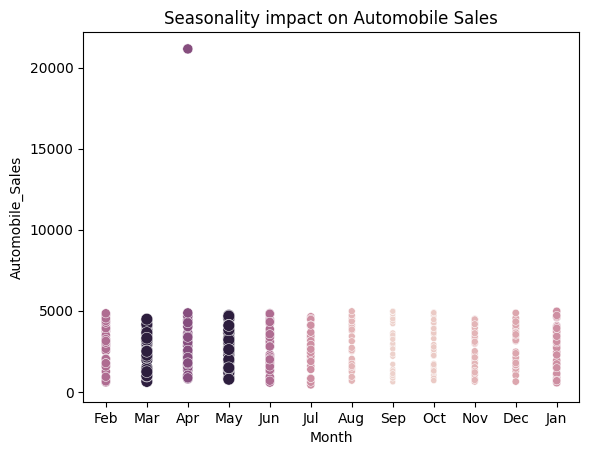

In [16]:
# this dataframe create above, here for clarity
#non_recession_data = df[df['Recession'] == 0]
    
size=non_recession_data['Seasonality_Weight'] #for bubble effect
    
sns.scatterplot(data=non_recession_data, x='Month', y='Automobile_Sales', size=size, hue='Seasonality_Weight', legend=False)
    
plt.xlabel('Month')
plt.ylabel('Automobile_Sales')
plt.title('Seasonality impact on Automobile Sales')

plt.show()

 ### TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.
 #### From the data, develop a scatter plot to identify if there a correlation between consumer confidence and automobile sales during recession period? 
 <br> Title this plot as 'Consumer Confidence and Automobile Sales during Recessions'

In [ ]:
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

 ### How does the average vehicle price relate to the sales volume during recessions?
 <br> Plot another scatter plot and title it as 'Relationship between Average Vehicle Price and Sales during Recessions'

In [ ]:
    #Create dataframes for recession and non-recession period
    rec_data = df[df['Recession'] == 1]
    plt.scatter(recession_data['Price'], rec_data['Automobile_Sales'])
    
    plt.xlabel('.....')
    plt.ylabel('.......')
    plt.title('..........')
    plt.show()

### Inference
There is not much relation!<br><br>
<span style="color:red">
Save this plot as "Scatter.png"</span><br>
*Hint: You can right lick on the plot and then click on "Save image as" option to save it on your local machine*

 ### TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZAutomotives during recession and non-recession periods.
 <br>How did the advertising expenditure of XYZAutomotives change during recession and non-recession periods? 

In [ ]:
    # Filter the data 
    Rdata = df[df['Recession'] == 1]
    NRdata = df[df['Recession'] == 0]

    # Calculate the total advertising expenditure for both periods
    RAtotal = Rdata['...........'].sum()
    NRAtotal = NRdata['...........'].sum()

    # Create a pie chart for the advertising expenditure 
    plt.figure(figsize=(8, 6))

    labels = ['Recession', 'Non-Recession']
    sizes = [RAtotal, NRtotal]
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('...........................')

    plt.show()

<span style="color:red">
Save this plot as "Pie_1.png"</span><br>

### TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.<br>
Can we observe the share of each vehicle type in total expenditure during recessions? 

In [ ]:
    # Filter the data 
    Rdata = df[df['Recession'] == 1]

    # Calculate the sales volume by vehicle type during recessions
    VTexpenditure = Rdata.groupby('..........')['.............'].sum()

    # Create a pie chart for the share of each vehicle type in total expenditure during recessions
    plt.figure(figsize=(..., ...))

    labels = VTexpenditure.index
    sizes = VTexpenditure.values
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)

    plt.title('....................')

    plt.show()

### Inference
During recession the advertisements were mostly focued on low price range vehicle. A wise decision!<br><br>
<span style="color:red">
Save this plot as "Pie_2.png"</span><br>

 ### TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.
 <br>Analyze the effect of the unemployment rate on vehicle type and sales during the Recession Period
 #### You can create a lineplot and title the plot as 'Effect of Unemployment Rate on Vehicle Type and Sales'

In [ ]:
df_rec = df[df['Recession']==1]
sns.lineplot(data=df_rec, x='..........', y='.........',
             hue='Vehicle_Type', style='Vehicle_Type', markers='o', err_style=None)
plt.ylim(0,850)
plt.legend(loc=(0.05,.3))

<span style="color:red">
Save this plot as "line_plot_3.png"</span><br>

### OPTIONAL : TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period

In [ ]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/us-states.json'
await download(path, "us-states.json")

filename = "us-states.json"

#### You found that the datset also contains the location/city for company offices. Now you want to show the recession impact on various offices/city sales by developing a choropleth

In [ ]:
    # Filter the data for the recession period and specific cities
    recession_data = data[data['Recession'] == 1]

    # Calculate the total sales by city
    sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

    # Create a base map centered on the United States
    map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

    # Create a choropleth layer using Folium
    choropleth = folium.Choropleth(
        geo_data= 'us-states.json',  # GeoJSON file with state boundaries
        data=sales_by_city,
        columns=['City', 'Automobile_Sales'],
        key_on='feature.properties.name',
        fill_color='YlOrRd',
        fill_opacity=0.7,
        line_opacity=0.2,
        legend_name='Automobile Sales during Recession'
    ).add_to(map1)


    # Add tooltips to the choropleth layer
    choropleth.geojson.add_child(
        folium.features.GeoJsonTooltip(['name'], labels=True)
    )

    # Display the map
    map1